Streaming data dan data preprocessing Kelompok 5 PDB

12S18002 : Wiranda Siahaan

12S18009 : Novita Enjelia Hutapea

12S18041 : Merika H. Manurung

12S18046 : Tiara Octavia Situmorang

# Consume twitter steaming data

In [39]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [40]:
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
import socket
import json
import numpy as np
import pandas as pd

In [41]:
#Kindly put your credentials received from twitter developer account
consumer_key='2mTmxHwkZramjVDOewE2dybgQ'
consumer_secret='dJ42E93prTAze5BoF4wAIcxYA6gXfu9rGrHr6gguUt85xcHJSi'
access_token ='1517128047019040768-YMZCcFIf6VLbZXNkJsa79sZk70xFkM'
access_secret='Auwa9WPIktjUCrgQmzceZsdMtMA2hbnebSR7QlmYEdrlq'

In [42]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [43]:
for tweet in api.search(q='miniso', lan='en'):    
    print(tweet.text)

@aiiixsa_013 Miniso?
Ya vieron el cerdito de miniso disfrazado de vaca ? Me muero de amor
Miniso set mouse &amp; keyboard wireless

Link: https://t.co/aJ2Ji2SbMv https://t.co/0InkrpdjVm
RT @CuteBarang: ✨Recommended farfum brand MINISO✨ 

A thread https://t.co/XkaFCLtHN7
@ohmybeautybank British Pear Lychee Freesia Peony, parfum Miniso dijamin ga bakalan dilepas
Wey en bóxers miniso me veo delicioso https://t.co/Xn2UiJ9NDM
pengen beli toy story x miniso tp lagi gaada duit dingin asksjsjskkkdh😖
Haiii Miniso Friends,🥰 tau gak sih, kini koleksi mainan Miniso lagi lengkap lohh, bisa untuk umur 3+ keatas nihh..😁… https://t.co/92nvUOxU0k
Haiii Miniso Friends,🥰 tau gak sih, kini koleksi mainan Miniso lagi lengkap lohh, bisa untuk umur 3+ keatas nihh..😁… https://t.co/xHR6MnQJso
Hoy estuve comprando algunas cosas en miniso y reafirmé la sensación de que los empleados de las cajas se sienten b… https://t.co/Dsd37Zljjt
Haiii Miniso Friends,🥰 tau gak sih, kini koleksi mainan Miniso lagi lengkap lohh

In [44]:
tweetDf = pd.DataFrame(columns = ['User', 'User_statuses_count', 
                             'user_followers','fav_count','User_location','Tweets',])

In [45]:
def stream(data, file_name):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100000, lang='en').items():
        print(i, end='\r')
        tweetDf.loc[i, 'User'] = tweet.user.name
        tweetDf.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        tweetDf.loc[i, 'user_followers'] = tweet.user.followers_count
        tweetDf.loc[i, 'fav_count'] = tweet.favorite_count
        tweetDf.loc[i, 'User_location'] = tweet.user.location
        tweetDf.loc[i, 'Tweets'] = tweet.text
        
        
        tweetDf.to_csv('{}.csv'.format(file_name))
        i+=1
        if i == 200:
            break
        else:
            pass

In [46]:
stream(data = ['miniso'], file_name = 'miniso_2021')

In [47]:
tweetDf.head()

,User,User_statuses_count,user_followers,fav_count,User_location,Tweets
0,Shopee Aesthetic ✨,822,823,0,Shopee,Miniso set mouse &amp; keyboard wireless\n\nLi...
1,Namrun,701,5,0,,RT @CuteBarang: ✨Recommended farfum brand MINI...
2,h3lluh,8878,247,0,/ svt / atz / nct / en- /,"RT @guillerhomo: ""people don't read anymore"" a..."
3,h3lluh,8878,247,0,/ svt / atz / nct / en- /,RT @seokwoo_thinker: They so cute \n\n#원우 #도겸 ...
4,h3lluh,8878,247,0,/ svt / atz / nct / en- /,RT @kwanthinkers: ‘this bag is 2x more expensi...


## Data Preprocessing

In [48]:
# libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [49]:
dataset = pd.read_csv('miniso_2021.csv') # to import the dataset into a variable
# Splitting the attributes into independent and dependent attributes
X = dataset.iloc[:, :-1].values # attributes to determine dependent variable / Class
Y = dataset.iloc[:, -1].values # dependent variable / Class

In [50]:
dataset.head()

,Unnamed: 0,User,User_statuses_count,user_followers,fav_count,User_location,Tweets
0,0,Shopee Aesthetic ✨,822,823,0,Shopee,Miniso set mouse &amp; keyboard wireless\n\nLi...
1,1,Namrun,701,5,0,NaN,RT @CuteBarang: ✨Recommended farfum brand MINI...
2,2,h3lluh,8878,247,0,/ svt / atz / nct / en- /,"RT @guillerhomo: ""people don't read anymore"" a..."
3,3,h3lluh,8878,247,0,/ svt / atz / nct / en- /,RT @seokwoo_thinker: They so cute \n\n#원우 #도겸 ...
4,4,h3lluh,8878,247,0,/ svt / atz / nct / en- /,RT @kwanthinkers: ‘this bag is 2x more expensi...


In [51]:
print(dataset.shape)

(200, 7)


### drop coloumn

In [52]:
to_drop = ['Unnamed: 0', 'User', 'User_statuses_count', 'user_followers', 'fav_count', 'User_location']

In [53]:
dataset.drop(to_drop, inplace=True, axis = 1)

In [54]:
dataset.head()

,Tweets
0,Miniso set mouse &amp; keyboard wireless\n\nLi...
1,RT @CuteBarang: ✨Recommended farfum brand MINI...
2,"RT @guillerhomo: ""people don't read anymore"" a..."
3,RT @seokwoo_thinker: They so cute \n\n#원우 #도겸 ...
4,RT @kwanthinkers: ‘this bag is 2x more expensi...


In [55]:
print(dataset.shape)

(200, 1)


### missing value

In [56]:
# handling the missing data and replace missing values with nan from numpy and replace with mean of all the other values
dataset1 = dataset.dropna()
print(dataset1.shape)

(200, 1)


# Text Preprocessing



In [57]:
import re, string, unicodedata
import json
import nltk
import json
import time
import itertools  
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import tensorflow.keras.preprocessing.text as kpt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

## Case folding

In [58]:
# Change text column to lower lower case
dataset1['Tweets'] = dataset1['Tweets'].str.lower()

# Look at the change
print(dataset1)

                                                Tweets
0    miniso set mouse &amp; keyboard wireless\n\nli...
1    rt @cutebarang: ✨recommended farfum brand mini...
2    rt @guillerhomo: "people don't read anymore" a...
3    rt @seokwoo_thinker: they so cute \n\n#원우 #도겸 ...
4    rt @kwanthinkers: ‘this bag is 2x more expensi...
..                                                 ...
195            my miniso addiction is coming back soon
196  apparently only the miniso in lagos fell off. ...
197  @_khunby @_dammyb_ do u have other miniso prod...
198      awwwww a miniso date🥹 https://t.co/kxqxao6waw
199  rt @_khunby: miniso backpack \n\ncan be carrie...

[200 rows x 1 columns]


## Remove URL

In [59]:
def clean_data(dataset2):
#replace URL of a text
    dataset1['Tweets'] = dataset2['Tweets'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

clean_data(dataset1)
print(dataset1['Tweets']);

0      miniso set mouse &amp; keyboard wireless\n\nli...
1      rt @cutebarang: ✨recommended farfum brand mini...
2      rt @guillerhomo: "people don't read anymore" a...
3      rt @seokwoo_thinker: they so cute \n\n#원우 #도겸 ...
4      rt @kwanthinkers: ‘this bag is 2x more expensi...
                             ...                        
195              my miniso addiction is coming back soon
196    apparently only the miniso in lagos fell off. ...
197    @_khunby @_dammyb_ do u have other miniso prod...
198                              awwwww a miniso date🥹  
199    rt @_khunby: miniso backpack \n\ncan be carrie...
Name: Tweets, Length: 200, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


## Remove Number

In [60]:
# removing numbers from strings of speciafied 
# column, here 'Name'
dataset1['Tweets']= dataset1['Tweets'].str.replace('\d+', '')
  
# display output with numbers removed from 
# required strings
print(dataset1)

                                                Tweets
0    miniso set mouse &amp; keyboard wireless\n\nli...
1    rt @cutebarang: ✨recommended farfum brand mini...
2    rt @guillerhomo: "people don't read anymore" a...
3    rt @seokwoo_thinker: they so cute \n\n#원우 #도겸 ...
4    rt @kwanthinkers: ‘this bag is x more expensiv...
..                                                 ...
195            my miniso addiction is coming back soon
196  apparently only the miniso in lagos fell off. ...
197  @_khunby @_dammyb_ do u have other miniso prod...
198                            awwwww a miniso date🥹  
199  rt @_khunby: miniso backpack \n\ncan be carrie...

[200 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


## Remove Punctuation

In [61]:
dataset1['Tweets'] = dataset1['Tweets'].str.replace(r'[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [62]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'\s*\d+\s*', '', text)
    text = re.sub('/[^\w\s]/gi', '', text)
    text = re.sub("@[^0-9a-zA-Z]+", '',text)
    text = re.sub(r'@[^\s]+', ' ', text)
    text = re.sub(r'#[^\w]+', ' ', text)
    text = re.sub(r"[.,:;+!\-_<^/=?&|$\"\(\)\d\*]", " ", text)
    text = re.sub('  +', ' ', text) 
    text = re.sub('\n+',' ',text)
    text = re.sub('\n', text)
    text = re.sub('\ ■',' ',text)
    text = re.sub(r'&[^\s]+', ' ', text)


    return text

In [63]:
clean_data(dataset1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
print(dataset1)

                                                Tweets
0    miniso set mouse amp keyboard wireless\n\nlink...
1    rt cutebarang recommended farfum brand miniso ...
2    rt guillerhomo people dont read anymore ao was...
3    rt seokwoo_thinker they so cute \n\n원우 도겸 seve...
4    rt kwanthinkers this bag is x more expensive t...
..                                                 ...
195            my miniso addiction is coming back soon
196  apparently only the miniso in lagos fell off b...
197  _khunby _dammyb_ do u have other miniso produc...
198                             awwwww a miniso date  
199  rt _khunby miniso backpack \n\ncan be carried ...

[200 rows x 1 columns]


## Hasil Akhir

In [65]:
dataset1.to_csv('preprocessing_PDB.csv', index = False)

In [66]:
data = pd.read_csv('preprocessing_PDB.csv')

In [67]:
from textblob import TextBlob

def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

def getPolarity(review):
    return TextBlob(review).sentiment.polarity

def analyze(score):
    if score  < 0:
        return 'Negatif'
    elif score == 0:
        return 'Netral'
    else:
        return 'Positiv'

In [68]:
final_data = pd.DataFrame(data[['Tweets']])
final_data.head()

,Tweets
0,miniso set mouse amp keyboard wireless\n\nlink...
1,rt cutebarang recommended farfum brand miniso ...
2,rt guillerhomo people dont read anymore ao was...
3,rt seokwoo_thinker they so cute \n\n원우 도겸 seve...
4,rt kwanthinkers this bag is x more expensive t...


In [69]:
final_data['Subjectivity'] = final_data['Tweets'].apply(getSubjectivity)
final_data['Polarity'] =  final_data['Tweets'].apply(getPolarity)
final_data['TextBlob'] = final_data['Polarity'].apply(analyze)
final_data.head()

,Tweets,Subjectivity,Polarity,TextBlob
0,miniso set mouse amp keyboard wireless\n\nlink...,0.000000,0.000000,Netral
1,rt cutebarang recommended farfum brand miniso ...,0.000000,0.000000,Netral
2,rt guillerhomo people dont read anymore ao was...,0.288889,-0.155556,Negatif
3,rt seokwoo_thinker they so cute \n\n원우 도겸 seve...,1.000000,0.500000,Positiv
4,rt kwanthinkers this bag is x more expensive t...,0.380000,0.182857,Positiv


In [70]:
tb_counts = final_data.TextBlob.value_counts()
tb_counts

Netral     137
Positiv     42
Negatif     21
Name: TextBlob, dtype: int64

([<matplotlib.patches.Wedge at 0x7f59bba6d8d0>,
 [Text(-0.6039251066842912, 0.9193880929816134, 'Netral'),
  Text(0.2735588698961101, -1.0654414787782402, 'Positiv'),
  Text(1.2772152184498422, -0.4372885612042943, 'Negatif')],
 [Text(-0.3294136945550679, 0.5014844143536072, '68.5%'),
  Text(0.14921392903424185, -0.5811498975154037, '21.0%'),
  Text(0.8041725449499006, -0.2753298348323334, '10.5%')])

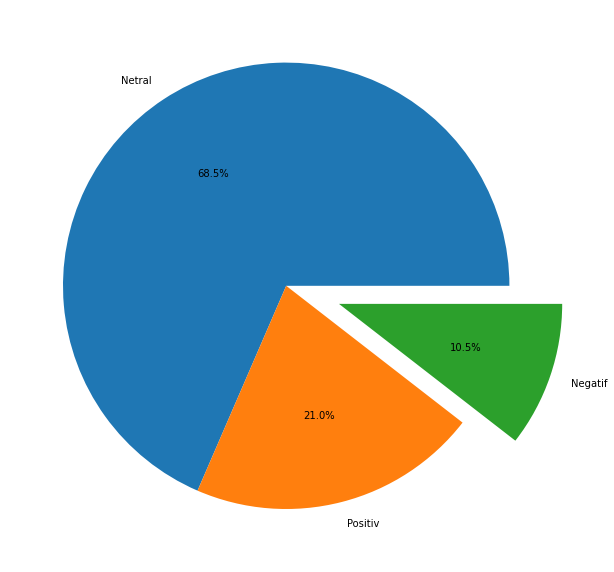

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,27))
plt.pie(tb_counts.values, labels=tb_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)

In [72]:
final_data.to_csv('dataprepro.csv', index = False)

## Analysist Using PySpark

Creating a spark session and importing the required libraries

In [73]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
import pyspark
from pyspark.sql import SparkSession
import pyspark.sql.functions as pyf
from pyspark.ml.feature import Tokenizer,StopWordsRemover, CountVectorizer,IDF,StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector
from pyspark.ml.classification import NaiveBayes
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [75]:
spark = SparkSession.builder.getOrCreate()

In [81]:
df = spark.read.csv('dataprepo.txt', sep='\t')

In [82]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)



In [83]:
new_df = df.withColumnRenamed('_c0', 'class').withColumnRenamed('_c1', 'text')

In [84]:
new_df.show(10)

+-------+--------------------+
|  class|                text|
+-------+--------------------+
|Positiv|amazonin really d...|
| Netral|why did i just fo...|
| Netral|ootdfess miniso nder|
| Netral|rt pajolicoe ashi...|
|Positiv|sehun miniso figu...|
| Netral|rt hunho wts  rea...|
|Positiv|funzobee miniso t...|
|Positiv|      miniso  heaven|
|Positiv|     diy sheet mask |
| Netral|miniso official p...|
+-------+--------------------+
only showing top 10 rows

